# Physical Data Preprocessing (C-Town)

### BATADAL Features
##### - Tanks: levels (m)
##### - Pumps: flows (L/S), statuses (on/off)
##### - Valves: flows (L/S),  statuses (on/off)
##### - Joints: Pressures after and before valves/pumps (eqaul to suction head (m), discharge head (m) for pump stations)

### Current Data: C-Town attack-free data (9 weeks with exceptions)

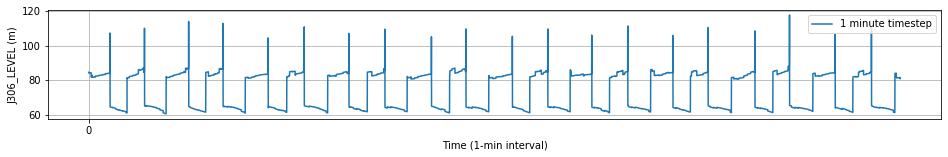

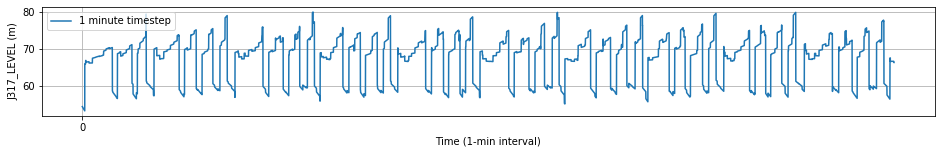

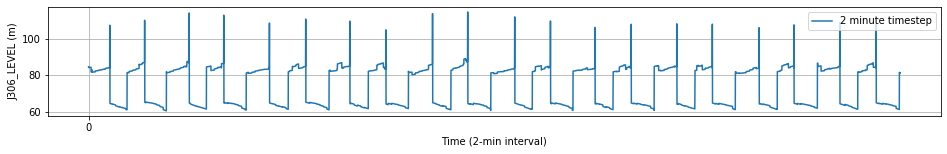

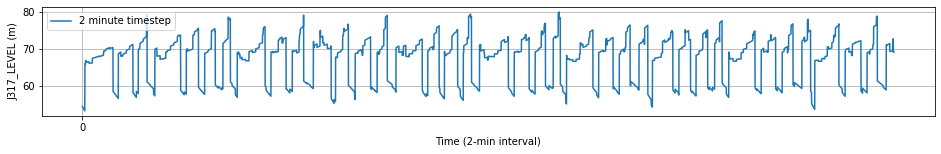

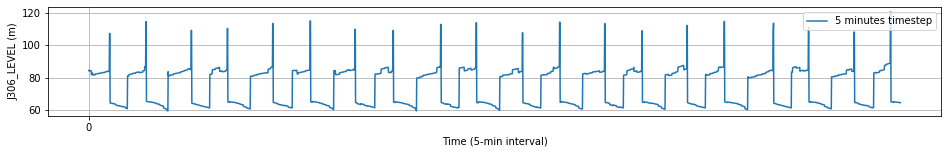

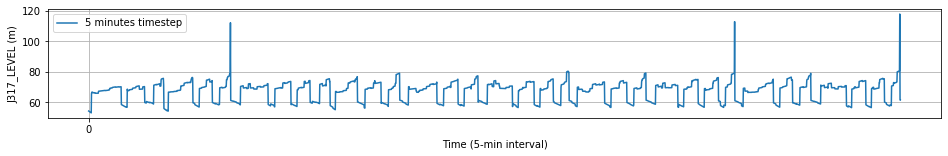

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import fileinput

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'   
    
path_in = 'data/'

sim_weeks = 1

# Data frame creation                
data_5_timestep = pd.read_csv('data/week_0_5_minute_timestep/physical_process.csv')    
data_2_timestep = pd.read_csv('data/week_0_2_minute_timestep/week_0/physical_process.csv')
data_1_timestep = pd.read_csv('data/week_0_1_minute_timestep/week_0/physical_process.csv')

#////////////////////////////// label, cat/non-cat variable definition     ///////////////////////////////

var_all = list(data_5_timestep.head(0))
#var_noncat = ['T1_LEVEL', 'T2_LEVEL', 'T3_LEVEL', 'T4_LEVEL', 'T5_LEVEL', 'T6_LEVEL', 'T7_LEVEL', 
#               'PU1_FLOW', 'PU2_FLOW', 'PU3_FLOW', 'PU4_FLOW', 'PU5_FLOW', 'PU6_FLOW', 'PU7_FLOW',
#               'PU8_FLOW', 'PU9_FLOW', 'PU10_FLOW', 'PU11_FLOW', 
#               'V2_FLOW', 
#               'J280_LEVEL', 'J269_LEVEL', 'J300_LEVEL', 'J256_LEVEL', 'J289_LEVEL', 'J415_LEVEL', 
#               'J302_LEVEL', 'J306_LEVEL', 'J307_LEVEL', 'J317_LEVEL', 'J14_LEVEL', 'J422_LEVEL']      
    
#var_cat =['PU1_STATUS', 'PU2_STATUS', 'PU3_STATUS', 'PU4_STATUS', 'PU5_STATUS', 'PU6_STATUS', 'PU7_STATUS', 'PU8_STATUS',
#          'PU9_STATUS','PU10_STATUS', 'PU11_STATUS',
#          'V2_STATUS'] 

#var_cat_noncat = var_noncat + var_cat
var_cat_noncat =['J306_LEVEL', 'J317_LEVEL']


label = ['Attack#01', 'Attack#02']


tanks = ['T1_LEVEL', 'T2_LEVEL', 'T3_LEVEL', 'T4_LEVEL', 'T5_LEVEL', 'T6_LEVEL', 'T7_LEVEL']

joints = ['J280_LEVEL', 'J269_LEVEL', 'J300_LEVEL', 'J256_LEVEL', 'J289_LEVEL', 'J415_LEVEL',
          'J302_LEVEL', 'J306_LEVEL', 'J307_LEVEL', 'J317_LEVEL', 'J14_LEVEL', 'J422_LEVEL']

flows = ['PU1_FLOW', 'PU2_FLOW', 'PU3_FLOW', 'PU4_FLOW', 'PU5_FLOW', 'PU6_FLOW', 
         'PU7_FLOW', 'PU8_FLOW', 'PU9_FLOW', 'PU10_FLOW', 'PU11_FLOW',
         'V2_FLOW']

xlabel_weeks = np.linspace(0, len(data_5_timestep), sim_weeks)
    
for var in (var_cat_noncat):
    plt.figure(figsize=(16, 2))    
    plt.plot(data_1_timestep[var], label="1 minute timestep")        
    plt.legend()
    plt.grid(True)
    
    if var in tanks:
        plt.ylabel(var + ' (m)')
    elif var in joints:
        plt.ylabel(var + ' (m)')
    elif var in flows:
        plt.ylabel(var + ' (L/S)')
    else:
        plt.ylabel(var)
        
    plt.xlabel('Time (1-min interval)')
    plt.xticks(xlabel_weeks), #plt.xlabel(label_x)
    plt.show()
    
for var in (var_cat_noncat):
    plt.figure(figsize=(16, 2))    
    plt.plot(data_2_timestep[var], label="2 minute timestep")        
    plt.legend()
    plt.grid(True)
    
    if var in tanks:
        plt.ylabel(var + ' (m)')
    elif var in joints:
        plt.ylabel(var + ' (m)')
    elif var in flows:
        plt.ylabel(var + ' (L/S)')
    else:
        plt.ylabel(var)
        
    plt.xlabel('Time (2-min interval)')
    plt.xticks(xlabel_weeks), #plt.xlabel(label_x)
    plt.show()    
    
for var in (var_cat_noncat):
    plt.figure(figsize=(16, 2))    
    plt.plot(data_5_timestep[var], label="5 minutes timestep")
    plt.legend()
    plt.grid(True)
    
    if var in tanks:
        plt.ylabel(var + ' (m)')
    elif var in joints:
        plt.ylabel(var + ' (m)')
    elif var in flows:
        plt.ylabel(var + ' (L/S)')
    else:
        plt.ylabel(var)
        
    plt.xlabel('Time (5-min interval)')
    plt.xticks(xlabel_weeks), #plt.xlabel(label_x)
    plt.show()    



# Spikes @ J317

  
 J317-PU10 Relation 
  
 J317 Spike @ 503 


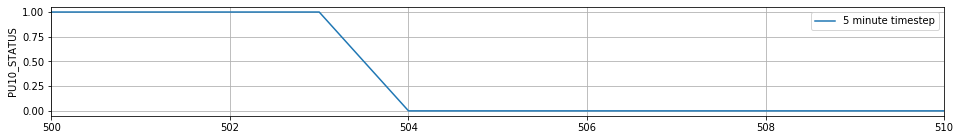

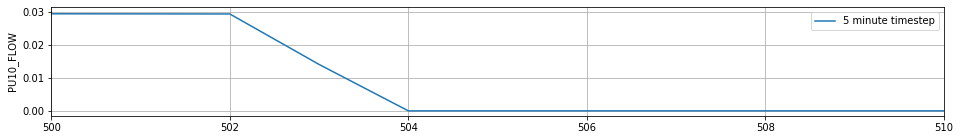

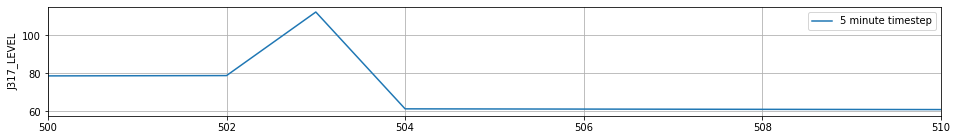

In [2]:
print(color.PURPLE, color.BOLD + "" , color.END)
print(color.PURPLE, color.BOLD + 'J317-PU10 Relation' , color.END)

select_var = ['PU10_STATUS', 'PU10_FLOW', 'J317_LEVEL'] #'J306_LEVEL',
spikes_new = list(data_5_timestep[data_5_timestep.J317_LEVEL > 85].index)

for sp in spikes_new[0:1]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'J317 Spike @ ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_5_timestep.loc[sp-20:sp+20,[var]], label="5 minute timestep" )
        plt.xlim(left=500, right=510)
        plt.legend()
        plt.grid(True)
        plt.ylabel(var)
        plt.show()

# Spikes @ J306

  
 J306-PU8 Relation 
  
 5 minutestep J317 Spike @ 74 


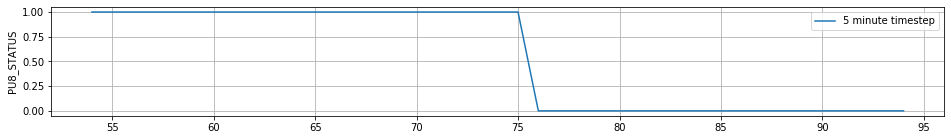

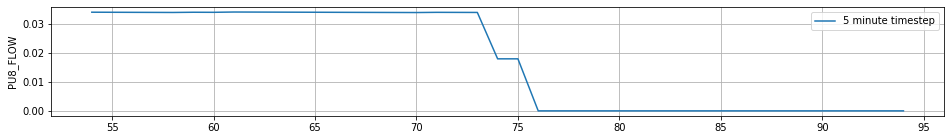

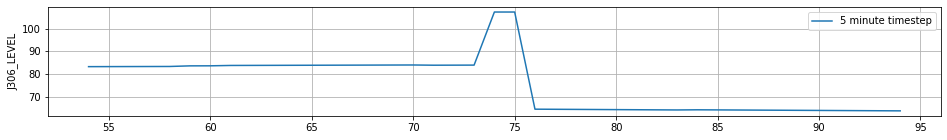

  
 5 minutestep J317 Spike @ 75 


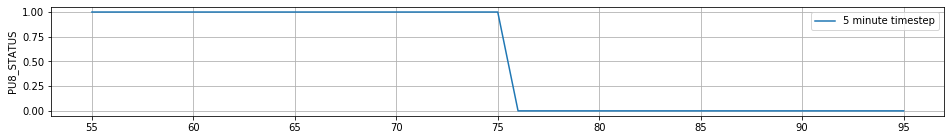

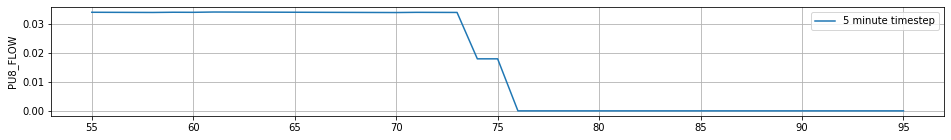

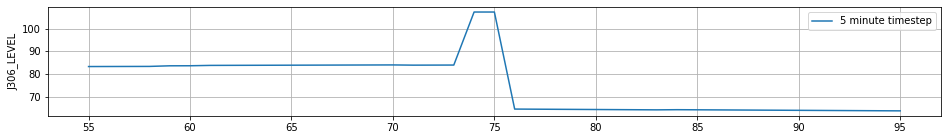

  
 2 minutestep J317 Spike @ 75 


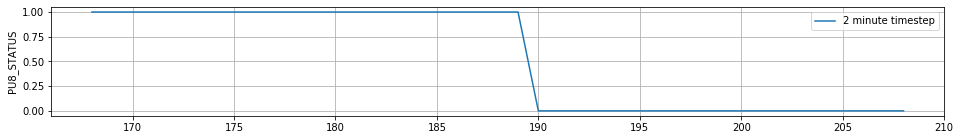

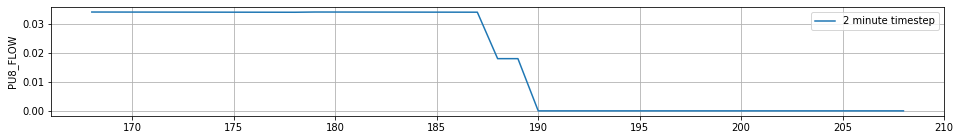

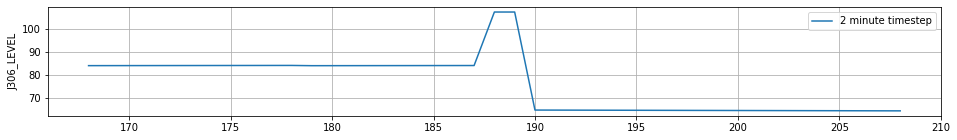

  
 2 minutestep J317 Spike @ 75 


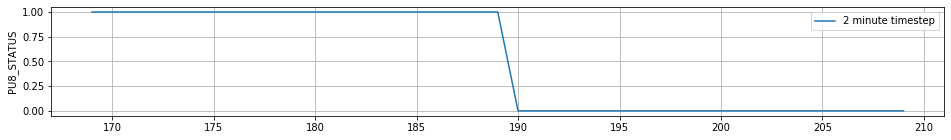

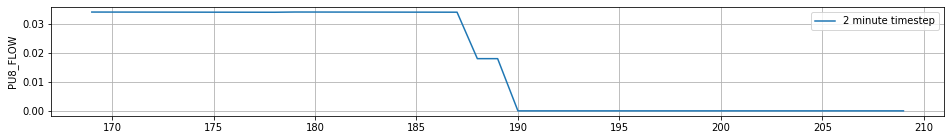

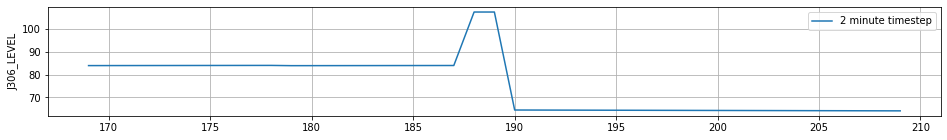

  
 1 minutestep J317 Spike @ 75 


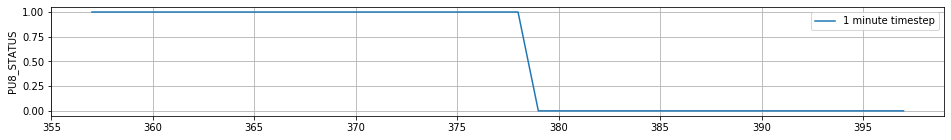

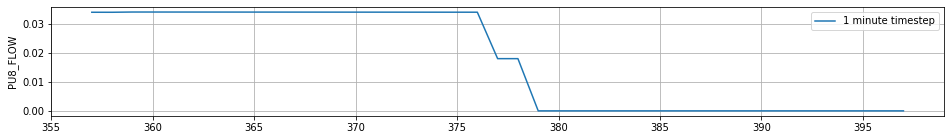

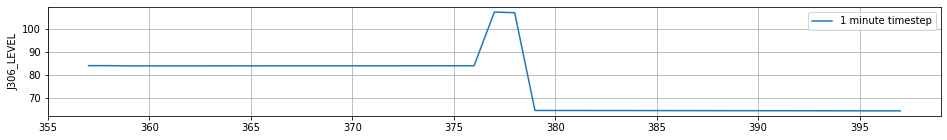

  
 1 minutestep J317 Spike @ 75 


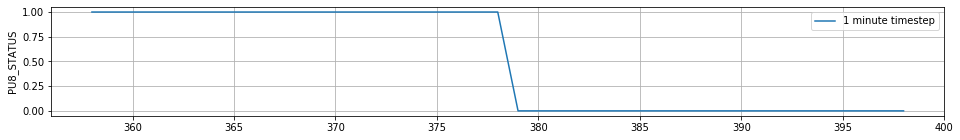

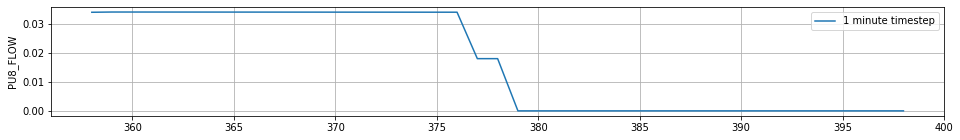

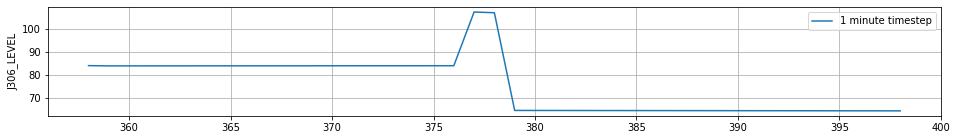

In [4]:
print(color.PURPLE, color.BOLD + "" , color.END)
print(color.PURPLE, color.BOLD + 'J306-PU8 Relation', color.END)

select_var = ['PU8_STATUS', 'PU8_FLOW', 'J306_LEVEL'] #'J306_LEVEL',
spikes = list(data_5_timestep[data_5_timestep.J306_LEVEL > 100].index)
spikes_2_minute = list(data_2_timestep[data_2_timestep.J306_LEVEL > 100].index)
spikes_1_minute = list(data_1_timestep[data_1_timestep.J306_LEVEL > 100].index)

for sp in spikes[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + '5 minutestep J317 Spike @ ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_5_timestep.loc[sp-20:sp+20,[var]], label="5 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)
        plt.show()

for sp_2m in spikes_2_minute[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + '2 minutestep J317 Spike @ ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_2_timestep.loc[sp_2m-20:sp_2m+20,[var]], label="2 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)
        plt.show()
        
for sp_1m in spikes_1_minute[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + '1 minutestep J317 Spike @ ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))    
        plt.plot(data_1_timestep.loc[sp_1m-20:sp_1m+20,[var]], label="1 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)
        plt.show()

# Pump 10's 1 upstream + 3 downstream nodes

  
 Upstream Joint: J307, Dowstream joints: J317, J384, J23 
  
 Spike @ Sample 503 


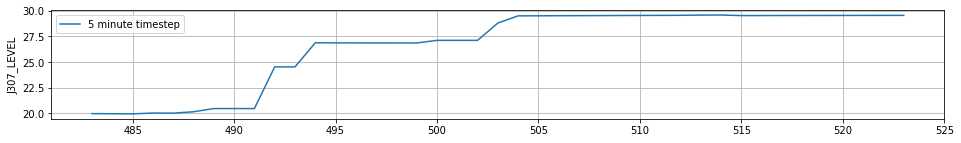

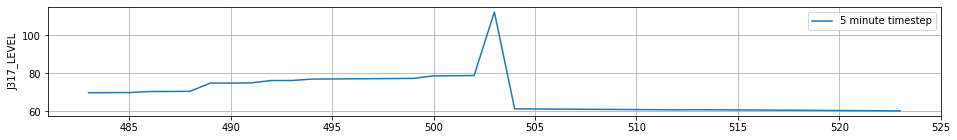

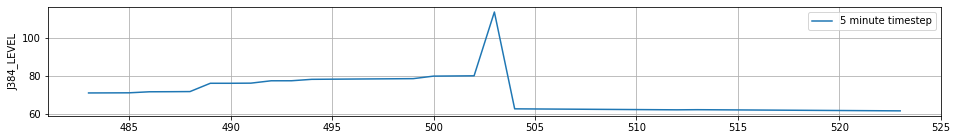

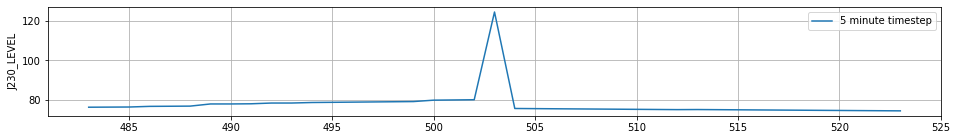

  
 Spike @ Sample 2292 


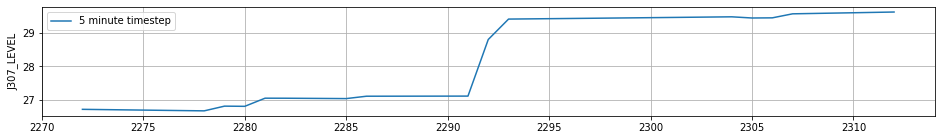

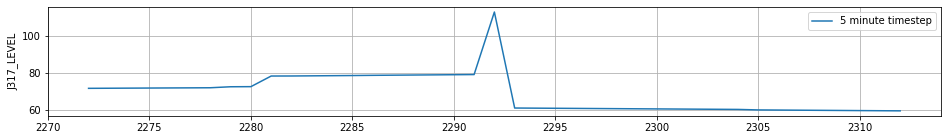

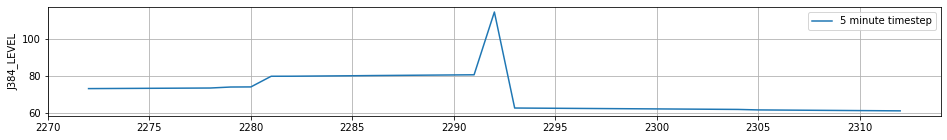

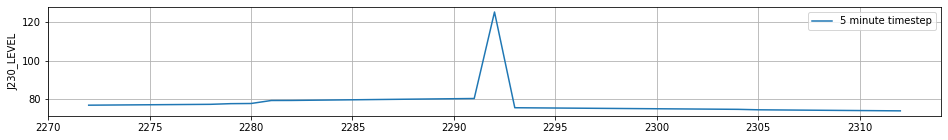

In [5]:
print(color.PURPLE, color.BOLD + "" , color.END)
print(color.PURPLE, color.BOLD + 'Upstream Joint: J307, Dowstream joints: J317, J384, J23', color.END)

select_var = ['J307_LEVEL', 'J317_LEVEL', 'J384_LEVEL', 'J230_LEVEL']
#select_var = ['PU10_STATUS', 'PU10_FLOW', 'J317_LEVEL'] #'J306_LEVEL',
spikes_5m = list(data_5_timestep[data_5_timestep.J317_LEVEL > 85].index)
spikes_2m = list(data_2_timestep[data_2_timestep.J317_LEVEL > 85].index)
spikes_1m = list(data_1_timestep[data_1_timestep.J317_LEVEL > 85].index)

for sp in spikes_5m[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'Spike @ Sample ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_5_timestep.loc[sp-20:sp+20,[var]], label="5 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)        
        plt.show()

for sp_2m in spikes_2m[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'Spike @ Sample ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_2_timestep.loc[sp_2m-20:sp_2m+20,[var]], label="2 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)        
        plt.show()            
        
for sp_1m in spikes_1m[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'Spike @ Sample ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_1_timestep.loc[sp_1m-20:sp_1m+20,[var]], label="1 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)        
        plt.show()        

# Pump 8's 1 upstream + 3 downstream nodes

  
 Upstream Joint: J301, Dowstream joints: J306, J87, J70 
  
 Spike @ Sample 74 


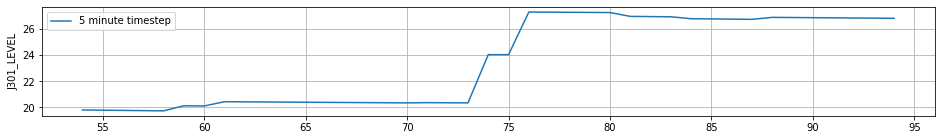

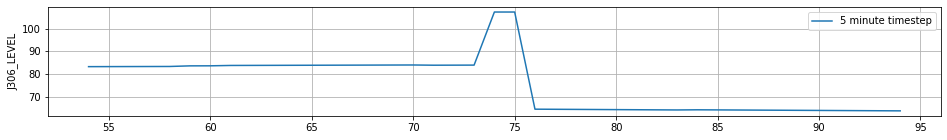

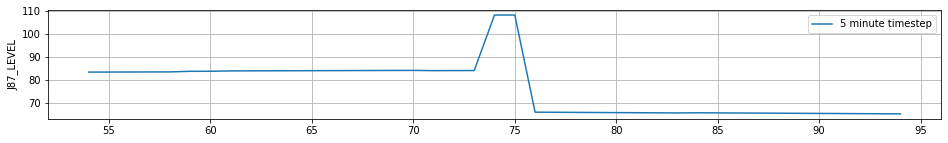

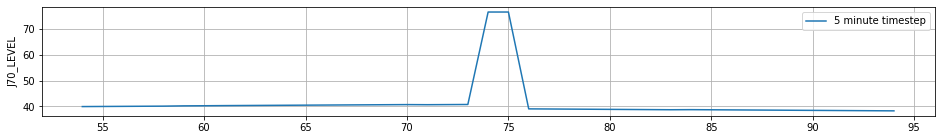

  
 Spike @ Sample 75 


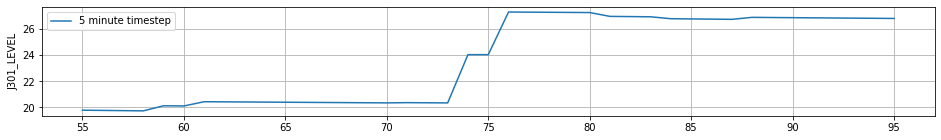

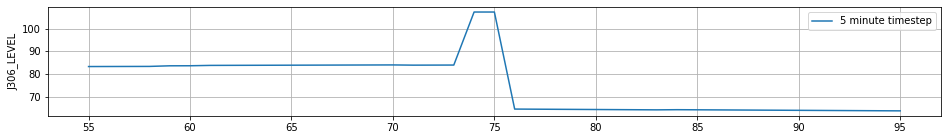

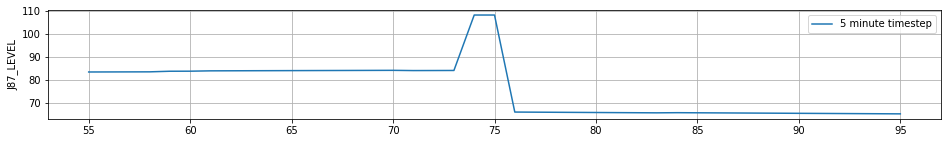

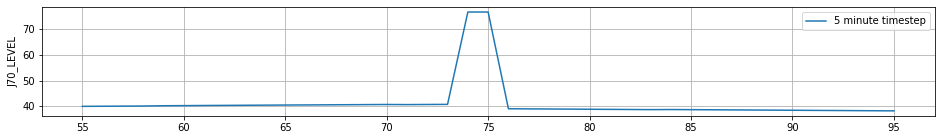

  
 Spike @ Sample 75 


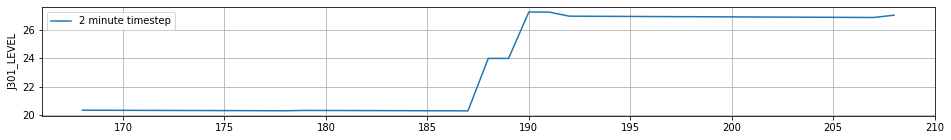

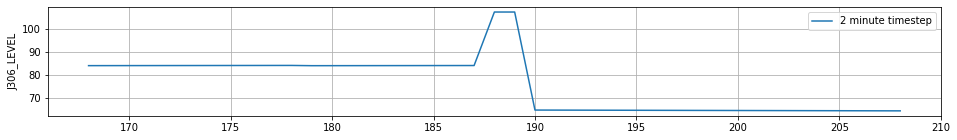

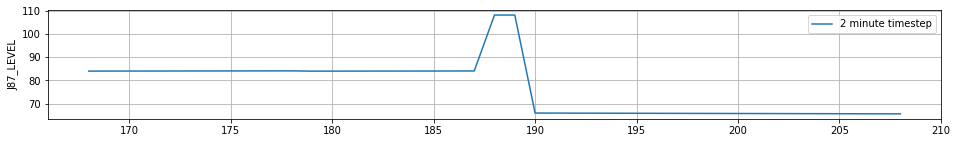

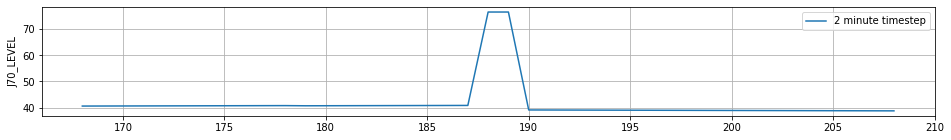

  
 Spike @ Sample 75 


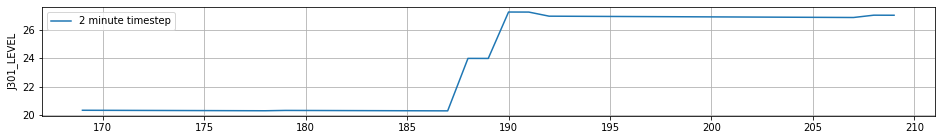

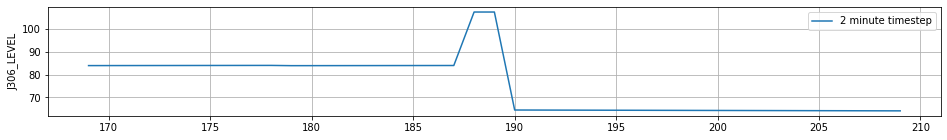

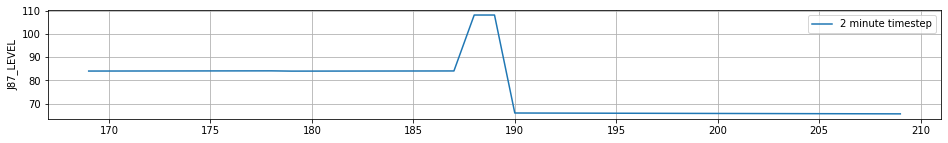

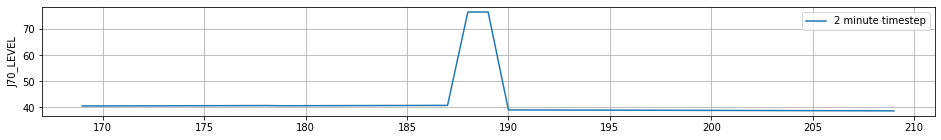

  
 Spike @ Sample 75 


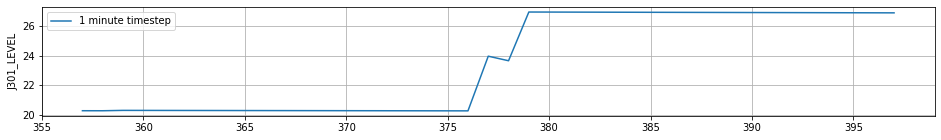

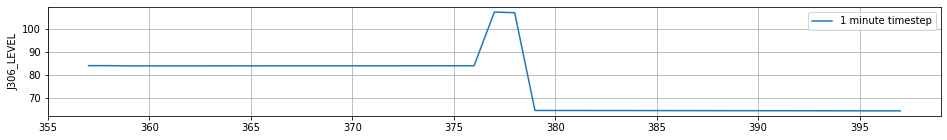

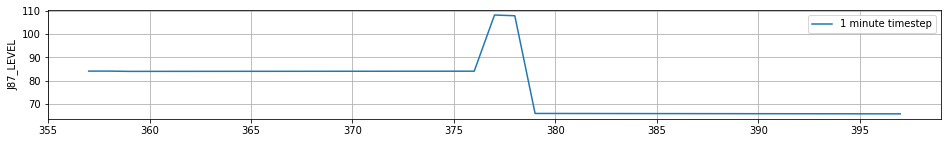

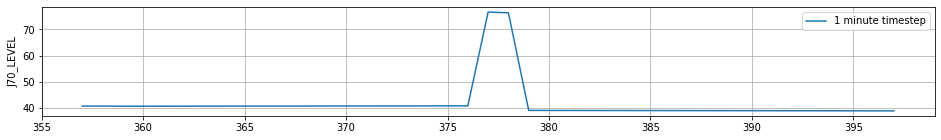

  
 Spike @ Sample 75 


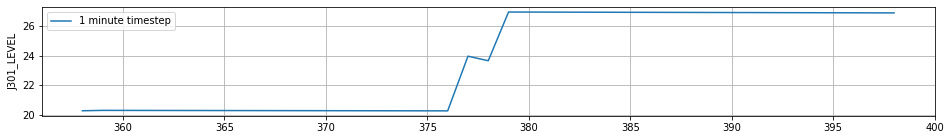

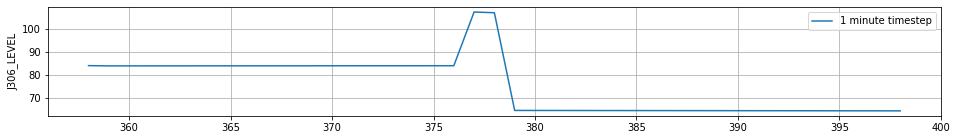

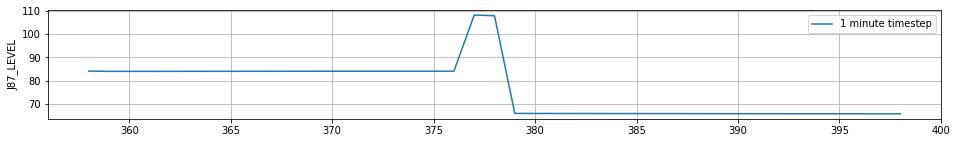

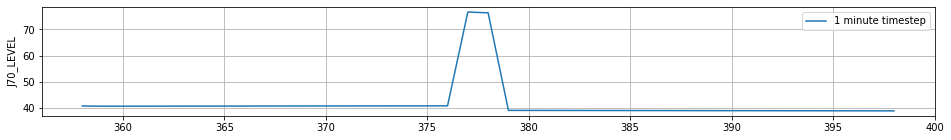

In [6]:
print(color.PURPLE, color.BOLD + "" , color.END)
print(color.PURPLE, color.BOLD + 'Upstream Joint: J301, Dowstream joints: J306, J87, J70', color.END)

select_var = ['J301_LEVEL', 'J306_LEVEL', 'J87_LEVEL', 'J70_LEVEL']
#select_var = ['PU8_STATUS', 'PU8_FLOW', 'J306_LEVEL'] #'J306_LEVEL',
spikes_5m = list(data_5_timestep[data_5_timestep.J306_LEVEL > 100].index)
spikes_2m = list(data_2_timestep[data_2_timestep.J306_LEVEL > 100].index)
spikes_1m = list(data_1_timestep[data_1_timestep.J306_LEVEL > 100].index)

for sp in spikes_5m[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'Spike @ Sample ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_5_timestep.loc[sp-20:sp+20,[var]], label="5 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)          
        plt.show()

for sp_2m in spikes_2m[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'Spike @ Sample ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_2_timestep.loc[sp_2m-20:sp_2m+20,[var]], label="2 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)          
        plt.show()
        
for sp_1m in spikes_1m[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'Spike @ Sample ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_1_timestep.loc[sp_1m-20:sp_1m+20,[var]], label="1 minute timestep")
        plt.ylabel(var)
        plt.legend()
        plt.grid(True)          
        plt.show()        